<a href="https://colab.research.google.com/github/Probingbug/foundations-for-ML/blob/main/momentum_based_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def quadratic_loss(x,y):
  return x**2+10*y**2


In [ ]:
def quadratic_grad(x,y):
  dx=2*x
  dy=20*y

  return np.array ([dx,dy])

batch gradient descent

In [ ]:
def batch_gradient_descent(grad_func,eta,epochs,start_point):
  x,y= start_point
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]
  for epoch in range(epochs):
    dx,dy=grad_func(x,y)
    x=x-eta*dx
    y=y-eta*dy
    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path),losses

with momentum

In [ ]:
def gradient_descent_momentum(grad_func,eta,beta,epochs,start_point):
  x,y= start_point
  path=[(x,y)]
  losses=[quadratic_loss(x,y)]
  v=np.array([0,0])

  for epoch in range(epochs):
    grad=grad_func(x,y)
    v=beta*v+(1-beta)*grad
    x=x-eta*v[0]
    y=y-eta*v[1]
    path.append((x,y))
    losses.append(quadratic_loss(x,y))
  return np.array(path),losses

visualization of path and losses

In [ ]:
# function for plotting the paths

def path_plot(functions,path,label,title):
  x,y=np.meshgrid(np.linspace(-2,2,400),np.linspace(-2,2,400))
  z=functions(x,y)

  plt.figure(figsize=(8,6))
  plt.contour(x,y,z,lebels=50,cmap='jet')

  for path, label in zip(path,label):
    plt.plot(path[:,0],path[:,1],label=label)
    plt.scatter(path[0,0],path[0,1],color='green',label='start')
    plt.scatter(path[-1,0],path[-1,1],color='red',label='end')
  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(title)
  plt.show()

visualization function for loss

In [ ]:
def plot_losses(losses,labels,title):
  plt.figure(figsize=(8,6))
  for loss,label in zip(losses,labels):
    plt.plot(loss,label=label)
  plt.title(title)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.show()

parameters

In [ ]:
eta_bgd=0.1
eta_moementum=0.1
beta = 0.9
epochs=50
start_points=(1.5,1.5)

calling the functions

In [ ]:
path_bgd,losses_bgd=batch_gradient_descent(quadratic_grad,eta_bgd,epochs,start_points)
path_momentum,losses_momentum=gradient_descent_momentum(quadratic_grad,eta_moementum,beta,epochs,start_points)

<ipython-input-22-9ee4b643eb5a>:8: UserWarning: The following kwargs were not used by contour: 'lebels'
  plt.contour(x,y,z,lebels=50,cmap='jet')


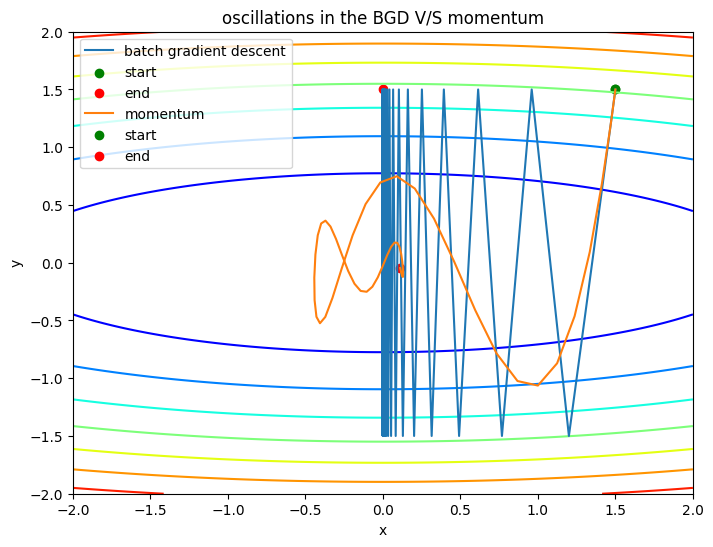

In [ ]:
path_plot(quadratic_loss,[path_bgd,path_momentum],['batch gradient descent','momentum'],"oscillations in the BGD V/S momentum")

plot the losses

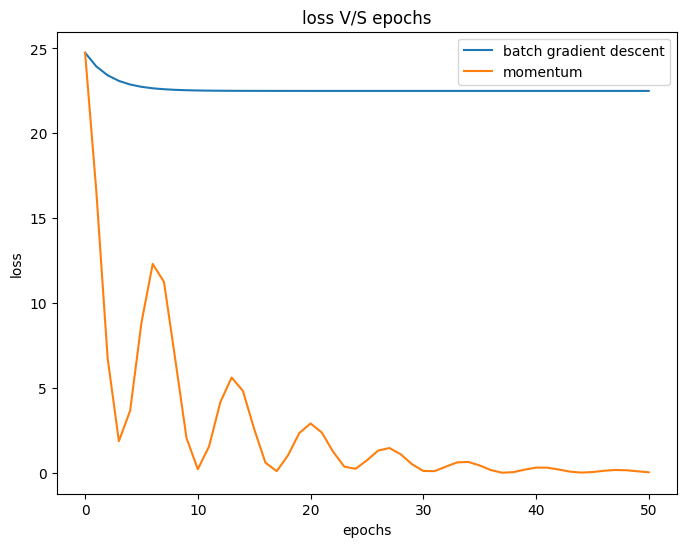

In [24]:
#for plotting the loss

plot_losses([losses_bgd,losses_momentum],['batch gradient descent','momentum'],"loss V/S epochs")

In [25]:
losses_momentum

[24.75,
 np.float64(16.560900000000004),
 np.float64(6.759264960000003),
 np.float64(1.8675617466240004),
 np.float64(3.672309319744665),
 np.float64(8.843285183359708),
 np.float64(12.3094918926023),
 np.float64(11.246403281338745),
 np.float64(6.686816378009605),
 np.float64(2.0465781414119),
 np.float64(0.2126613066115431),
 np.float64(1.5633691099715803),
 np.float64(4.169226890507775),
 np.float64(5.615916031069389),
 np.float64(4.828945682317156),
 np.float64(2.586386989647691),
 np.float64(0.6001722393401042),
 np.float64(0.09975398411450212),
 np.float64(1.0327334898955147),
 np.float64(2.3409973655715195),
 np.float64(2.9093329693459866),
 np.float64(2.3758076666698544),
 np.float64(1.2466953211027911),
 np.float64(0.36527537417011696),
 np.float64(0.23962892251629297),
 np.float64(0.7400786370228303),
 np.float64(1.3137408447015861),
 np.float64(1.463318654920823),
 np.float64(1.0950673284048806),
 np.float64(0.5101399292379962),
 np.float64(0.1132104831574299),
 np.float64(0

In [26]:
eta_bgd=0.01
eta_moementum=0.01
beta = 0.9
epochs=50
start_points=(1.5,1.5)

In [27]:
path_bgd,losses_bgd=batch_gradient_descent(quadratic_grad,eta_bgd,epochs,start_points)
path_momentum,losses_momentum=gradient_descent_momentum(quadratic_grad,eta_moementum,beta,epochs,start_points)

<ipython-input-22-9ee4b643eb5a>:8: UserWarning: The following kwargs were not used by contour: 'lebels'
  plt.contour(x,y,z,lebels=50,cmap='jet')


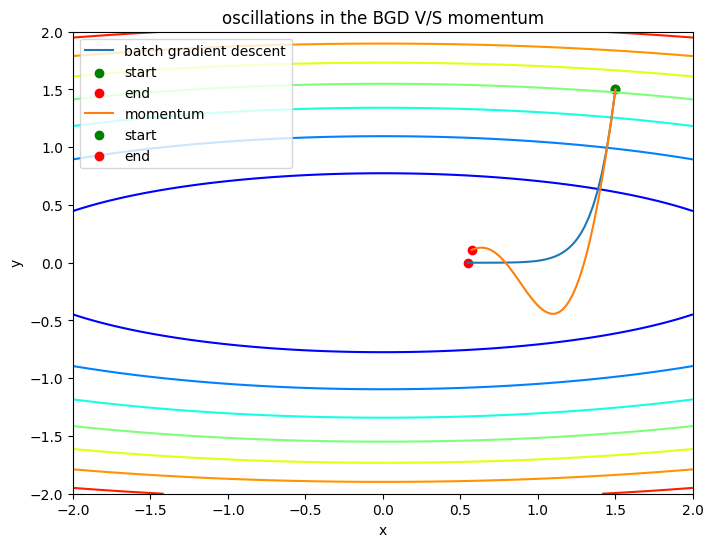

In [28]:
path_plot(quadratic_loss,[path_bgd,path_momentum],['batch gradient descent','momentum'],"oscillations in the BGD V/S momentum")

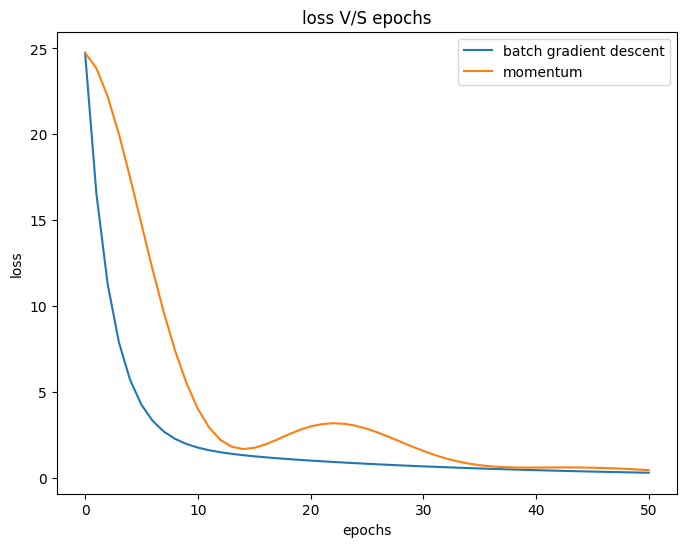

In [29]:
#for plotting the loss

plot_losses([losses_bgd,losses_momentum],['batch gradient descent','momentum'],"loss V/S epochs")

In [30]:
losses_momentum

[24.75,
 np.float64(23.850009),
 np.float64(22.206643185635997),
 np.float64(20.01059611096467),
 np.float64(17.46499236184782),
 np.float64(14.766992721847412),
 np.float64(12.093415207198756),
 np.float64(9.5906884635364),
 np.float64(7.369067200842487),
 np.float64(5.5007312404159805),
 np.float64(4.021168707322058),
 np.float64(2.9331101029136732),
 np.float64(2.212226982986824),
 np.float64(1.8138254132814757),
 np.float64(1.6798358425130102),
 np.float64(1.7455116727595725),
 np.float64(1.9453828163194526),
 np.float64(2.218153340463545),
 np.float64(2.510371451797104),
 np.float64(2.7788257398784353),
 np.float64(2.9917268496800027),
 np.float64(3.1288145097703683),
 np.float64(3.1805846585869597),
 np.float64(3.1468610719498455),
 np.float64(3.0349429400169425),
 np.float64(2.8575480372991393),
 np.float64(2.6307449505121077),
 np.float64(2.372031987510692),
 np.float64(2.098679433049165),
 np.float64(1.8264098131090063),
 np.float64(1.5684511543039314),
 np.float64(1.334963436